<a href="https://colab.research.google.com/github/hamednasr/TensorFlow-Projects/blob/main/FashionMNIST_classification_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST classification with TensorFlow

## import data

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix,classification_report

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9664792751905311626
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14465892352
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14075890905510659122
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [5]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
classes = {
  0: 'T-shirt/top',
  1: 'trouser',
  2: 'pullover',
  3: 'dress',
  4: 'coat',
  5: 'sandal',
  6: 'shirt',
  7: 'sneaker',
  8: 'bag',
  9: 'ankle boot'
}

In [11]:
classes[y_train[6]]

'sneaker'

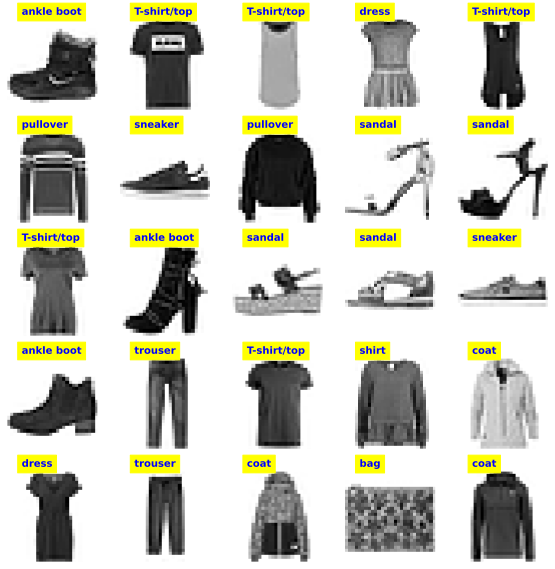

In [12]:
fig, axes = plt.subplots(5,5,figsize=(8,8))
for i , ax in enumerate(axes.flatten()):
  ax.imshow(X_train[i,:],cmap='binary')
  ax.axis('off')
  ax.text(4,-2,classes[y_train[i]],
          backgroundcolor='yellow',
          fontweight='bold',
          color='blue')
plt.tight_layout()

## create and train model

In [33]:
from sklearn.utils.extmath import softmax

model = tf.keras.Sequential()
# model.add(tf.keras.layers.InputLayer(input_shape=(28,28)))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512,activation=tf.keras.layers.LeakyReLU()))
model.add(tf.keras.layers.Dense(256,activation=tf.keras.layers.LeakyReLU()))
model.add(tf.keras.layers.Dense(128,activation=tf.keras.layers.LeakyReLU()))
model.add(tf.keras.layers.Dense(64,activation=tf.keras.layers.LeakyReLU()))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
# model.add(tf.keras.layers.Activation(tf.keras.activations.softmax))

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

history = model.fit(X_train,y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=.1)

Epoch 1/30
422/422 [==============================] - 6s 13ms/step - loss: 4.3418 - accuracy: 0.7613 - val_loss: 0.7185 - val_accuracy: 0.8213
Epoch 2/30
422/422 [==============================] - 5s 13ms/step - loss: 0.7022 - accuracy: 0.8152 - val_loss: 0.5494 - val_accuracy: 0.8418
Epoch 3/30
422/422 [==============================] - 5s 13ms/step - loss: 0.5175 - accuracy: 0.8398 - val_loss: 0.5052 - val_accuracy: 0.8428
Epoch 4/30
422/422 [==============================] - 5s 13ms/step - loss: 0.4467 - accuracy: 0.8526 - val_loss: 0.6697 - val_accuracy: 0.8083
Epoch 5/30
422/422 [==============================] - 5s 12ms/step - loss: 0.4361 - accuracy: 0.8553 - val_loss: 0.5562 - val_accuracy: 0.8328
Epoch 6/30
422/422 [==============================] - 5s 12ms/step - loss: 0.4058 - accuracy: 0.8626 - val_loss: 0.4430 - val_accuracy: 0.8553
Epoch 7/30
422/422 [==============================] - 5s 12ms/step - loss: 0.4000 - accuracy: 0.8649 - val_loss: 0.4661 - val_accuracy: 0.8490